# Проект: Исследование стартапов


### Цель и задачи

**Цель:** 

Провести исследование исторических данных о стартапах для подготовки качественного датасета, проверки корректности информации и получения аналитических выводов, которые помогут компании выработать подход к выходу на инвестиционный рынок и определить перспективные направления для приобретения и развития стартапов. 

**Задачи:**

1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
- Изучить динамику раундов финансирования по годам.
- Оценить полноту информации о сотрудниках и их образовании в зависимости от размера компаний.
- Проверить возможность объединения таблиц по ключевым столбцам (company_id, network_username).
- Подготовить проблемные датасеты (например, company_and_rounds.csv) к дальнейшему исследованию.
3. Провести исследовательский объединенных таблиц:
- Сформировать единый датасет компаний с историей финансирования или приобретений.
- Оценить типичные значения и выбросы в финансировании стартапов.
- Исследовать компании, проданные за 0 или 1 доллар при ненулевом финансировании.
- Определить категории стартапов с высокими ценами приобретения и значительным разбросом цен.
- Проанализировать количество раундов финансирования для стартапов с разным статусом.
4. Сформулировать выводы по проведенному анализу.


---


## Шаг 1. Знакомство с данными: загрузка и первичная предобработка

Данные состоят из следующих датасетов:

Описание датасета `acquisition`.
Содержит информацию о покупках одними компаниями других компаний:
- `id` — идентификатор покупки.
- `acquiring_company_id` — идентификатор покупающей компании.
- `acquired_company_id` — идентификатор покупаемой компании.
- `term_code` — варианты расчёта.
- `price_amount` — сумма сделки.
- `acquired_at` — дата сделки.

Описание датасета `company_and_rounds`.
Содержит информацию о компаниях и раундах финансирования:
- `company_id` — идентификатор компании.
- `name` — название компании.
- `category_code` — категория области деятельности компании.
- `status` — статус компании.
- `founded_at` — дата основания компании.
- `closed_at` — дата закрытия компании.
- `domain` — официальный сайт компании.
- `network_username` — ник компании в сети.
- `country_code` — код страны компании.
- `investment_rounds` — число инвестиционных раундов.
- `funding_rounds` — число раундов финансирования.
- `funding_total` — сумма финансирования.
- `milestones` — вехи финансирования.
- `funding_round_id` — идентификатор этапа финансирования.
- `funded_at` — дата финансирования.
- `funding_round_type` — тип финансирования.
- `raised_amount` — сумма финансирования.
- `pre_money_valuation` — предварительная денежная оценка.
- `participants` — число участников.
- `is_first_round` — является ли раунд первым.
- `is_last_round` — является ли раунд последним.


Описание датасета `people`.
Содержит информацию о сотрудниках:
- `id` — идентификатор сотрудника.
- `first_name` — имя сотрудника.
- `last_name` — фамилия сотрудника.
- `company_id` — идентификатор компании.
- `network_username` — ник в социальных сетях.


Описание датасета `education`.
Содержит информацию об образовании сотрудников:
- `id` — идентификатор записи об образовании.
- `person_id` — идентификатор сотрудника.
- `instituition` — название учебного заведения.
- `graduated_at` — дата получения образования.

Описание датасета `degrees`.

Содержит информацию о типе образования сотрудника:
- `id` — идентификатор записи.
- `object_id` — идентификатор сотрудника.
- `degree_type` — тип образования.
- `subject` — специальность.



**Опциональные датасеты**:

Описание датасета `fund` 
Содержит информацию о фондах:
- `id` — идентификатор фонда.
- `name` — название фонда.
- `category_code` — категория деятельности фонда.
- `founded_at` — дата создания фонда.
- `domain` — сайт фонда.
- `network_username` — ник фонда в сети.
- `country_code` — код страны фонда.
- `investment_rounds` — число инвестиционных раундов.
- `invested_companies` — число профинансированных компаний.
- `milestones` — вехи финансирования.

Описание датасета `investment` 
Содержит информацию о раундах инвестирования:
- `id` — идентификатор этапа инвестирования.
- `funding_round_id` — идентификатор раунда инвестирования.
- `company_id` — идентификатор компании.
- `funding_round_type` — тип финансирования.
- `fund_id` — идентификатор фонда.

### 1.1. Вывод общей информации, исправление названия столбцов

---


Названия файлов:
* acquisition.csv
* company_and_rounds.csv
* people.csv
* education.csv
* degrees.csv

Опциональные датасеты:
* fund.csv
* investment.csv


In [100]:
# Импортируем библиотеки
import pandas as pd
import numpy as np

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

!pip install matplotlib-venn -q
from matplotlib_venn import venn2
import matplotlib.pyplot as plt

In [7]:
# Константа с базовым путем
PATH = "https://code.s3.yandex.net/datasets/"

# Загрузка датасетов
acquisition_df = pd.read_csv(PATH + 'acquisition.csv')
company_and_rounds_df = pd.read_csv(PATH + 'company_and_rounds.csv')
people_df = pd.read_csv(PATH + 'people.csv')
education_df = pd.read_csv(PATH + 'education.csv')
degrees_df = pd.read_csv(PATH + 'degrees.csv')

#Загрузим оптициональные датасеты, но пока не будем их анализировать
fund_df = pd.read_csv(PATH + 'fund.csv')
investment_df = pd.read_csv(PATH + 'investment.csv')

Познакомимся с данными датасета `acquisition_df` — выведем первые строки методом `head()`, а информацию о датафрейме методом `info()`, и проверим название стобцов:

---

In [8]:
# Выводим первые строки датафрейма на экран acquisition_df
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [9]:
# Выводим информацию о датафрейме acquisition_df
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [10]:
# Выводим названия столбцов датафрейма acquisition_df
acquisition_df.columns

Index(['id', 'acquiring_company_id', 'acquired_company_id', 'term_code',
       'price_amount', 'acquired_at'],
      dtype='object')

Датасет `acquisition_df` содержит 6 столбцов и 9 407строк, в которых представлена информация о покупках одними компаниями других компаний.

После первичного анализа данных можно сделать следующие выводы:
- Столбцы `id`, `acquiring_company_id`, `acquired_company_id` и `price_amount` полностью заполнены.
- Столбцы `term_code` и `acquired_at` содержат пропуски (`term_code` — 7 576 пропусков, `acquired_at` — 29 пропусков).
- Типы данных: 4 числовых (`int64`) и 2 объектных (`object`).
- Названия столбцов корректные, без пробелов и специальных символов.
- Судя по первому знакомству с данными, значения в столбцах соответствуют своему описанию.

Теперь познакомимся с данными датасета `company_and_rounds_df`.

---   

In [11]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
# Выводим информацию о датафрейме 
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

In [13]:
# Выводим названия столбцов датафрейма 
company_and_rounds_df.columns

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')

In [14]:
# Создаем копию исходного датасета
company_and_rounds_temp = company_and_rounds_df.copy()

# Проверяем количество строк
len(company_and_rounds_temp)

217774

Обращаем внимание, что у  нас есть  два столбца с похожим названием `company  ID` и `company  id` и если привести название столбцов к единому стилю snake_case, название столбцов станут идентичными -  `company__id` и приведет к  дублированию. В исходном описании столбцов видно, что два столбца company id имеют разное значение:
- company ID — идентификатор самой компании (основной).
- company id — идентификатор компании, связанный с конкретным раундом финансирования.

Изучим пересечение этих двух столбцов. 
 
---  

In [15]:
first_id = set(company_and_rounds_df['company  ID'].dropna().unique())
second_id = set(company_and_rounds_df['company  id'].dropna().unique())

# Пересечение
intersection_count = len(first_id.intersection(second_id))

# Уникальные для company ID
unique_first_count = len(first_id.difference(second_id))

# Уникальные для company id (раунд)
unique_second_count = len(second_id.difference(first_id))

print("Совпадающие ID:", intersection_count)
print("Уникальные для company ID:", unique_first_count)
print("Уникальные для company id:", unique_second_count)

Совпадающие ID: 31707
Уникальные для company ID: 164846
Уникальные для company id: 232


Совпадают: 31 707 — раунды привязаны к существующим компаниям.
- Только в company ID: 164 846 — компании без данных о раундах.
- Только в company id: 232 — редкие раунды без основной компании (скорее ошибки).

То есть большинство раундов связано с компаниями, но пропуски возникают из-за компаний без раундов или редких некорректных записей.

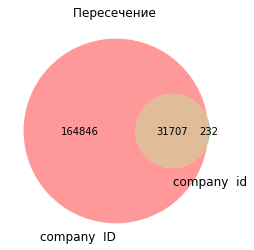

In [16]:

venn2([first_id, second_id], set_labels=('company  ID', 'company  id'))

# Отображаем график
plt.title("Пересечение ")
plt.show() 


Переменуем столбцы.

--- 

In [17]:
# Создаем словарь для переименования
rename_dict = {
    'company  ID': 'company_id',            # основной идентификатор компании
    'name': 'name',
    'category  code': 'category_code',
    'status': 'status',
    'founded  at': 'founded_at',
    'closed  at': 'closed_at',
    'domain': 'domain',
    'network  username': 'network_username',
    'country  code': 'country_code',
    'investment  rounds': 'investment_rounds',
    'funding  rounds': 'funding_rounds',
    'funding  total': 'funding_total',
    'milestones': 'milestones',
    'funding  round  id': 'funding_round_id',
    'company  id': 'company_id_round',      # идентификатор компании для раунда
    'funded  at': 'funded_at',
    'funding  round  type': 'funding_round_type',
    'raised  amount': 'raised_amount',
    'pre  money  valuation': 'pre_money_valuation',
    'participants': 'participants',
    'is  first  round': 'is_first_round',
    'is  last  round': 'is_last_round'
}

# Переименовываем столбцы, порядок сохраняется
company_and_rounds_df = company_and_rounds_df.rename(columns=rename_dict)

# Проверяем результат
company_and_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

In [18]:
# Создаем словарь для переименования
rename_dict = {
    'company  ID': 'company_id',            # основной идентификатор компании
    'name': 'name',
    'category  code': 'category_code',
    'status': 'status',
    'founded  at': 'founded_at',
    'closed  at': 'closed_at',
    'domain': 'domain',
    'network  username': 'network_username',
    'country  code': 'country_code',
    'investment  rounds': 'investment_rounds',
    'funding  rounds': 'funding_rounds',
    'funding  total': 'funding_total',
    'milestones': 'milestones',
    'funding  round  id': 'funding_round_id',
    'company  id': 'company_id_round',      # идентификатор компании для раунда
    'funded  at': 'funded_at',
    'funding  round  type': 'funding_round_type',
    'raised  amount': 'raised_amount',
    'pre  money  valuation': 'pre_money_valuation',
    'participants': 'participants',
    'is  first  round': 'is_first_round',
    'is  last  round': 'is_last_round'
}

# Переименовываем столбцы, порядок сохраняется
company_and_rounds_df = company_and_rounds_df.rename(columns=rename_dict)

# Проверяем результат
company_and_rounds_df.columns

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'company_id_round', 'funded_at',
       'funding_round_type', 'raised_amount', 'pre_money_valuation',
       'participants', 'is_first_round', 'is_last_round'],
      dtype='object')

Датасет `company_and_rounds_df` содержит 22 столбца и 217 774 строки с информацией о компаниях и их раундах финансирования.
- После переменования столбцов, основной идентификатор компании оставлен как `company_id`.
- Второй идентификатор, связанный с конкретным раундом финансирования, переименован в `company_id_round`, чтобы избежать дублирования.
- Многие столбцы имеют пропуски, особенно `founded_at` (более 100 000 пропусков), `closed_at` (более 214 000 пропусков), `network_username` и `country_code` (часть компаний не указала ник в сети или код страны).
- Типы данных: 12 числовых (`float64`) и 10 объектных (`object`).
- После приведения названий к snake_case колонки стали удобными для дальнейшей работы: `company__id`, `category__code`, `founded__at` и т.д.
- Создание копии исходного датасета позволило сохранить оригинальные данные для проверки изменений.

Теперь познакомимся с данными датасета `education_df`.

---   

In [19]:
# Выводим первые строки датафрейма на экран
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [20]:
# Выводим информацию о датафрейме
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [21]:
# Выводим названия столбцов датафрейма 
education_df.columns

Index(['id', 'person_id', 'instituition', 'graduated_at'], dtype='object')

Датасет `education_df` содержит 4 столбца и 109 610 строк, в которых представлена информация об образовании сотрудников.
- Столбцы `id` и `person_id` полностью заполнены.
- Столбцы `instituition` и `graduated_at` содержат пропуски: `instituition` — 55 пропусков, `graduated_at` — 51 556 пропусков.
- Типы данных: 2 числовых (`int64`) и 2 объектных (`object`).
- Названия столбцов корректные, без пробелов и специальных символов.
- Датасет в целом подготовлен, но значительная часть данных о датах окончания обучения отсутствует, что потребует внимательной обработки при анализе.

Теперь познакомимся с данными датасета `people_df`.

---  

In [22]:
# Выводим первые строки датафрейма на экран
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


In [23]:
# Выводим информацию о датафрейме
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [24]:
# Выводим названия столбцов датафрейма 
people_df.columns

Index(['id', 'first_name', 'last_name', 'company_id', 'network_username'], dtype='object')

Датасет `people_df` содержит 5 столбцов и 226709  сторок и содержит информацию о сотрудниках: их идентификаторы, имена, фамилии, принадлежность к компаниям и сетевые ники.
- Столбцы `id` и `last_name` полностью заполнены.
- Столбец `first_name` имеет 5 пропусков, а `company_id` заполнен лишь частично (34 615 значений из 226 709)
- Столбец `network_username` содержит пропуски (не все сотрудники имеют указанный ник в сети).
- Типы данных: числовые (`int64`), (`float64`) и объектные (`object`).
- Названия столбцов корректные, без пробелов и специальных символов.
Часть данных о компаниях и сетевых никах отсутствует, что нужно учитывать при анализе. Названия столбцов корректные, типы данных соответствуют содержимому.

Теперь познакомимся с данными датасета `degrees_df`.

---  

In [25]:
# Выводим первые строки датафрейма на экран
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


In [26]:
# Выводим информацию о датафрейме
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [27]:
# Выводим названия столбцов датафрейма 
degrees_df.columns

Index(['id', 'object_id', 'degree_type', 'subject'], dtype='object')

Датасет `degrees_df` содержит 4 столбца и 109 610 строк, в которых представлена информация о типе образования сотрудников:
- `id `— уникальный идентификатор записи (все значения заполнены)
- `object_id` — идентификатор сотрудника (все значения заполнены).
- `degree_type` — тип образования (10 218 пропусков).
- `subject` — специальность (28 312 пропусков).
- Типы данных: один числовой (id) и три объектных (object).

Сходство полей:
- В `degrees_df` есть столбец `object_id`, который обозначает сотрудника (ID в формате "p:<number>").
- В `education_df` есть столбец `person_id`, который также идентифицирует сотрудника.
    
Префикс "p:" нужно удалить, чтобы привести к числовому формату, сопоставимому с person_id в education_df:
    
--- 

### 1.2. Смена типов и анализ пропусков


In [28]:
# Обработаем типы данных в датасете acquisition_df.
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    9407 non-null   int64 
 1   acquiring_company_id  9407 non-null   int64 
 2   acquired_company_id   9407 non-null   int64 
 3   term_code             1831 non-null   object
 4   price_amount          9407 non-null   int64 
 5   acquired_at           9378 non-null   object
dtypes: int64(4), object(2)
memory usage: 441.1+ KB


In [29]:
#Перечислим категориальные столбцы
categorical_columns = ['id', 'acquiring_company_id', 'acquired_company_id', 'term_code']

# Массовое преобразование типов
for col in categorical_columns:
    acquisition_df[col] = acquisition_df[col].astype('category')

In [30]:
# Преобразуем price_amount в float
acquisition_df['price_amount'] = pd.to_numeric(acquisition_df['price_amount'], errors='coerce', downcast='float')

# Преобразуем acquired_at в datetime
acquisition_df['acquired_at'] = pd.to_datetime(acquisition_df['acquired_at'], errors='coerce')

# Проверим результат
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   category      
 1   acquiring_company_id  9407 non-null   category      
 2   acquired_company_id   9407 non-null   category      
 3   term_code             1831 non-null   category      
 4   price_amount          9407 non-null   float32       
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: category(4), datetime64[ns](1), float32(1)
memory usage: 1003.2 KB


Анализ пропусков:
В столбцах `term_code`  и `acquired_at` присутствуют пропуски. 
- `term_code`  - варианты расчета. Заполним на значение "Неизвестно", чтобы столбец стал полностью заполненным для анализа категорий.
- `acquired_at`  - дата сделки. Пропуски сохраняются, чтобы не искажать данные о датах сделок.
Пропуски могут быть связаны с тем, что сделки не были осуществлены.

In [31]:
# Обработаем типы данных в company_and_rounds_df.
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   company_id           217472 non-null  float64
 1   name                 217472 non-null  object 
 2   category_code        143886 non-null  object 
 3   status               217472 non-null  object 
 4   founded_at           109956 non-null  object 
 5   closed_at            3449 non-null    object 
 6   domain               147159 non-null  object 
 7   network_username     95534 non-null   object 
 8   country_code         108607 non-null  object 
 9   investment_rounds    217472 non-null  float64
 10  funding_rounds       217472 non-null  float64
 11  funding_total        217472 non-null  float64
 12  milestones           217472 non-null  float64
 13  funding_round_id     52928 non-null   float64
 14  company_id_round     52928 non-null   float64
 15  funded_at        

In [32]:
# Преобразуем company_id в категориальный тип
company_and_rounds_df['company_id'] = company_and_rounds_df['company_id'].astype('category')

In [33]:
# Список столбцов с датами
date_columns = ['founded_at', 'closed_at', 'funded_at']

# Преобразуем в datetime
for col in date_columns:
    company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], errors='coerce')

In [34]:
#Обработаем типы данных для целых чисел
columns = ['investment_rounds', 'funding_rounds', 'participants']
for col in columns:
    company_and_rounds_df[col] = pd.to_numeric(company_and_rounds_df[col], errors = 'coerce', downcast = 'integer')

In [35]:
#Обработаем типы данных для булевых значений
columns = ['is_first_round', 'is_last_round']
for col in columns:
    company_and_rounds_df[col] = (company_and_rounds_df[col]).astype('bool')
    
# Проверим результат
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  category      
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

In [36]:
# Подсчет пропусков в абсолютных значениях
company_and_rounds_df.isna().sum()


company_id                302
name                      302
category_code           73888
status                    302
founded_at             107818
closed_at              214325
domain                  70615
network_username       122240
country_code           109167
investment_rounds         302
funding_rounds            302
funding_total             302
milestones                302
funding_round_id       164846
company_id_round       164846
funded_at              165094
funding_round_type     164846
raised_amount          164846
pre_money_valuation    164846
participants           164846
is_first_round              0
is_last_round               0
dtype: int64

In [37]:
# Подсчет пропусков в процентах
company_and_rounds_df.isna().sum() /company_and_rounds_df.shape[0] *100

company_id              0.138676
name                    0.138676
category_code          33.928752
status                  0.138676
founded_at             49.509124
closed_at              98.416248
domain                 32.425818
network_username       56.131586
country_code           50.128574
investment_rounds       0.138676
funding_rounds          0.138676
funding_total           0.138676
milestones              0.138676
funding_round_id       75.695905
company_id_round       75.695905
funded_at              75.809784
funding_round_type     75.695905
raised_amount          75.695905
pre_money_valuation    75.695905
participants           75.695905
is_first_round          0.000000
is_last_round           0.000000
dtype: float64

Анализ пропусков:
- **Минимальные пропуски** (`company_id`(14%), `name`(14%), `status`(14%), `investment_rounds` (14%), `funding_rounds` (14%),`funding_total` (14%), `milestones` (14%)  ) - можно либо удалить эти 302 строки, либо заменить на "Неизвестно".

- **Самый высокий процент пропусков** (`closed_at`(98%)) - дата закрытия компании. Пропуски могут быть потому, что компания все еще работает. Пропуски заменять не будем.
- **Основной процент пропусков(более 75%)**: 
	- `funding_round_id` (75.7%) — идентификатор этапа финансирования. Отсутствие значения допустимо. Замены выполнять не будем.
	- `company_id_round` (75.7%) — аналогично предыдущему. Пропуски оставляем.
	- `funded_at` (75.81%) — дата финансирования. Не у всех компаний были инвестиции.Заменять не будем
	- `funding_round_type` (75.7%) —  заменить на "Неизвестно".
	- `raised_amount` (75.7%) — сумма финансирования. Можно заполнить медианным значением по типу компании.
	- `pre_money_valuation` (75.7%) — предварительная оценка компании. Возможен расчёт на основе raised_amount и типа финансирования.
	- `participants` (75.7%) — количество участников в раунде. Пропуски заменять не будем.

---

In [38]:
# Обработаем типы данных в датасете education_df.
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            109610 non-null  int64 
 1   person_id     109610 non-null  int64 
 2   instituition  109555 non-null  object
 3   graduated_at  58054 non-null   object
dtypes: int64(2), object(2)
memory usage: 3.3+ MB


In [39]:
#Перечислим категориальные столбцы
categorical_columns = ['id', 'person_id']

# Массовое преобразование типов
for col in categorical_columns:
    education_df[col] = education_df[col].astype('category')

In [40]:
# Преобразуем agraduated_at в datetime
education_df['graduated_at'] = pd.to_datetime(education_df['graduated_at'], errors='coerce')

# Проверим результат
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  category      
 1   person_id     109610 non-null  category      
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), object(1)
memory usage: 9.9+ MB


Анализ пропусков:
- `institution` — 55 пропусков (0.05%). Можно заменить на "Неизвестно".
- `graduated_at` — 47% пропусков. Не все заканчивали учебное заведение или дата не указана. Заполнять не стоит.

---

In [41]:
# Обработаем типы данных в датасете education_df.
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                226709 non-null  int64  
 1   first_name        226704 non-null  object 
 2   last_name         226708 non-null  object 
 3   company_id        34615 non-null   float64
 4   network_username  38867 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 8.6+ MB


In [42]:
#Перечислим категориальные столбцы
categorical_columns = ['id', 'company_id']

# Массовое преобразование типов
for col in categorical_columns:
    people_df[col] = people_df[col].astype('category')
    
# Проверим результат
people_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226709 entries, 0 to 226708
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   id                226709 non-null  category
 1   first_name        226704 non-null  object  
 2   last_name         226708 non-null  object  
 3   company_id        34615 non-null   category
 4   network_username  38867 non-null   object  
dtypes: category(2), object(3)
memory usage: 17.0+ MB


Анализ пропусков:
- `first_name` - имя сотрудника. Заменим на 'Неизвестно'.
- `last_name` - фамилия сотрудника. Заменим на 'Неизвестно'.
- `company_id` - id компании, в которой работает сотрудник. Возможно, что на тот момент сотрудник уже не работал. Заменять не будем.
- `network_username` - ник пользователя в сети. Заменим на 'Неизвестно'.

---

In [43]:
# Обработаем типы данных в датасете education_df.
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           109610 non-null  int64 
 1   object_id    109610 non-null  object
 2   degree_type  98392 non-null   object
 3   subject      81298 non-null   object
dtypes: int64(1), object(3)
memory usage: 3.3+ MB


In [44]:
# Cтолбец id меняем тип на  категориальный
degrees_df['id'] = degrees_df['id'].astype('category')

In [46]:
# Столбец  object_id  убираем 'p:' и приводим к категории
degrees_df['object_id'] = degrees_df['object_id'].str.replace('p:', '').astype('category')

Анализ пропусков:
- `degree_type` - пропуски оставляем, так как сотрудник мог еще не получить степень.
- `subject` - пропуски оставляем, так как сотрудник мог еще не получить специальность.

---

- Типы данных приведены к оптимальным для анализа (категориальные, числовые, даты, булевые).
- Пропуски в логически оправданных столбцах (даты финансирования, закрытия компании, степени) оставлены пустыми.
- Для полноценного анализа потребуется учитывать неполноту данных, особенно по финансированию компаний и образованию сотрудников.

---

## Шаг 2. Предобработка данных, предварительное исследование


### 2.1. Раунды финансирования по годам


In [47]:
# Сводная таблица по годам
company_pivot=company_and_rounds_df.pivot_table(
     values='raised_amount',
     index=company_and_rounds_df['funded_at'].dt.year,  # группировка по годам
     aggfunc=['median','count']                         # медиана и количество
 )

# Переименуем колонки
company_pivot.columns=['типичный размер средств','общее количество раундов']
    
# Фильтруем только годы с более чем 50 раундами

company_pivot=company_pivot[company_pivot['общее количество раундов']>50]
    
display(company_pivot)

,типичный размер средств,общее количество раундов
funded_at,,
1999.0,2000000.0,76
2000.0,4200000.0,125
2001.0,3000000.0,96
2002.0,4200000.0,116
2003.0,3000000.0,159
2004.0,5000000.0,291
2005.0,5500000.0,1633
2006.0,5000000.0,2436
2007.0,3973320.0,3279


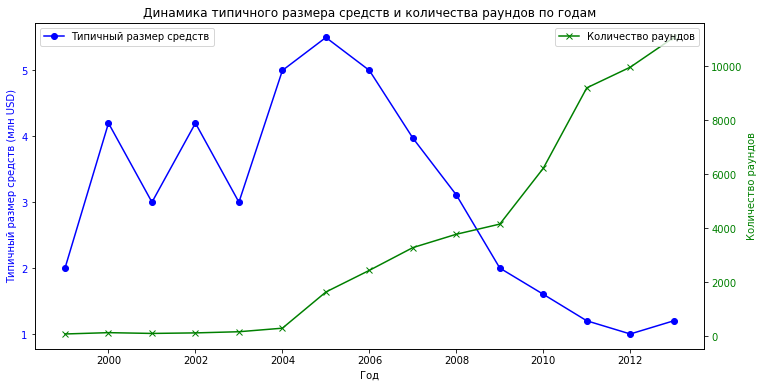

In [48]:
# Создаем график
fig, ax1 = plt.subplots(figsize=(12,6))

# Линия 1: типичный размер средств (в млн USD)
ax1.plot(company_pivot.index, company_pivot['типичный размер средств']/1_000_000,
         color='blue', marker='o', label='Типичный размер средств')
ax1.set_xlabel('Год')
ax1.set_ylabel('Типичный размер средств (млн USD)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Линия 2: количество раундов
ax2 = ax1.twinx()
ax2.plot(company_pivot.index, company_pivot['общее количество раундов'],
         color='green', marker='x', label='Количество раундов')
ax2.set_ylabel('Количество раундов', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Заголовок
plt.title('Динамика типичного размера средств и количества раундов по годам')

# Легенда
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

На освнове сводной таблицы, можем ответить на следующие вопросы:
1. **В каком году типичный размер собранных в рамках одного раунда средств был максимален?**
- Максимальный типичный размер средств наблюдался в `2005 году` — 5 500 000 USD на раунд.
2. **Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?**
- В 2013 году количество раундов (`11 072`) значительно выше, чем в 2012 году (`9 970`), что говорит о росте активности рынка стартапов.
- При этом типичный размер средств на раунд уменьшился по сравнению с пиком в 2005–2006 годах, что может указывать на то, что большее количество раундов стало меньше по размеру.
-  в 2005 года произошло насыщение инвестиций в крупный стартапы и финансироваться стали самые мелкие (По сути кому попало стали выдавать деньги). Вот поэтому количество раундов резко выросло, а финансирование за раунд упала

---

### 2.2. Люди и их образование
- Оценим, насколько информация об образовании сотрудников полна. Используя датасеты `people.csv` и `education.csv`, разделим все компании на несколько групп по количеству сотрудников и оценим среднюю долю сотрудников без информации об образовании в каждой из групп.

In [49]:
# Объединяем people и education 
people_education_df = people_df.merge(
    education_df,
    how='left',
    left_on='id',
    right_on='person_id',
    suffixes=('_people', '_education')
)

people_education_df.info()
people_education_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 267694 entries, 0 to 267693
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   id_people         267694 non-null  int64         
 1   first_name        267689 non-null  object        
 2   last_name         267693 non-null  object        
 3   company_id        44789 non-null   category      
 4   network_username  50775 non-null   object        
 5   id_education      109056 non-null  float64       
 6   person_id         109056 non-null  category      
 7   instituition      109002 non-null  object        
 8   graduated_at      57691 non-null   datetime64[ns]
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 21.1+ MB


,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10,Harvard University,NaT
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT


In [50]:
# Убираем дубликаты сотрудников
people_education_df = people_education_df.drop_duplicates(subset='id_people')

In [51]:
# Создаем бинарный флаг 'no_education': 1, если данных об образовании нет, 0 — если есть
people_education_df['no_education'] = people_education_df['id_education'].isna().astype(int)

# Просмотрим результат
people_education_df

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,no_education
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10,Harvard University,NaT,0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1
...,...,...,...,...,...,...,...,...,...,...
267689,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,1
267690,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088,Sydney University Medical School,1982-01-01,0
267691,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386,ESCS,2004-01-01,0
267692,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,1


- 1 - нет данных об образовании
- 0 -  данные есть

In [52]:
# Берем все person_id из education (т.е. людей, у которых есть хотя бы одно образование)
#edu_person_ids = education_df['person_id'].dropna().unique()

# Для каждого сотрудника в people проверяем, есть ли он в списке edu_person_ids
#people_df['has_education'] = people_df['id'].isin(edu_person_ids).astype(int)
# Создаем обратный флаг — нет образования
#people_df['no_education'] = 1 - people_df['has_education']

In [53]:
# Подсчет числа сотрудников в каждой компании
company_sizes = people_education_df.groupby('company_id')['id_people'].count().reset_index()

# Переименуем столбец для ясности
company_sizes = company_sizes.rename(columns={'id_people': 'num_employees'})

company_sizes.head()

,company_id,num_employees
0,1.0,2
1,2.0,1
2,3.0,3
3,4.0,13
4,5.0,61


Объединим `num_employees` с данными сотрудников.

---

In [54]:
# Объединяем информацию о размере компании с данными сотрудников
people_education_df = people_education_df.merge(
    company_sizes,
    on='company_id',
    how='left'
)
# Проверяем результат
people_education_df

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,no_education,num_employees
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10,Harvard University,NaT,0,61.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1,10.0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1,3.0
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1,2.0
4,100000,Sue,Pilsch,NaN,NaN,NaN,NaN,NaN,NaT,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...
226703,99999,Ramon,Peypoch,NaN,NaN,NaN,NaN,NaN,NaT,1,NaN
226704,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088,Sydney University Medical School,1982-01-01,0,1.0
226705,118386,Ricardo,Durand,143419.0,itechsocialnet,18871.0,118386,ESCS,2004-01-01,0,1.0
226706,175827,mahesh,kumar,NaN,socialnethubs,NaN,NaN,NaN,NaT,1,NaN


In [55]:
# Убираем пропуски num_employees (не относящиеся к компаниям)
people_education_df = people_education_df[people_education_df['num_employees'].notna()]
people_education_df

,id_people,first_name,last_name,company_id,network_username,id_education,person_id,instituition,graduated_at,no_education,num_employees
0,10,Mark,Zuckerberg,5.0,NaN,2415.0,10,Harvard University,NaT,0,61.0
1,100,Peter,Lester,27.0,NaN,NaN,NaN,NaN,NaT,1,10.0
2,1000,Dr. Steven,E. Saunders,292.0,NaN,NaN,NaN,NaN,NaT,1,3.0
3,10000,Neil,Capel,2526.0,NaN,NaN,NaN,NaN,NaT,1,2.0
6,100006,Courtney,Homer,81558.0,jobsbostontech,83604.0,100006,MIT Sloan School of Management,2004-01-01,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
226695,99990,Tzvi,Milshtein,81971.0,NaN,14547.0,99990,Technion,1971-01-01,0,1.0
226697,99992,Romain,Brabant,146815.0,NaN,NaN,NaN,NaN,NaT,1,1.0
226701,99997,Peter,Lalonde,83651.0,peterlalonde,69682.0,99997,University of Ottawa,1993-01-01,0,1.0
226704,174088,Dr. Ray,Woods,188200.0,network,25958.0,174088,Sydney University Medical School,1982-01-01,0,1.0


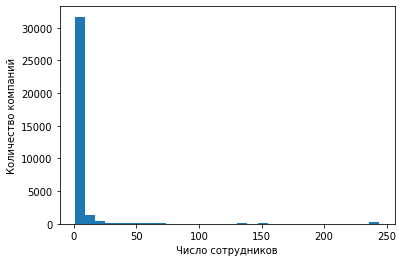

In [56]:
# Сначала посмотрим распределение количества сотрудников

plt.hist(people_education_df['num_employees'].dropna(), bins=30)
plt.xlabel("Число сотрудников")
plt.ylabel("Количество компаний")
plt.show()

In [57]:
# Посмотрим на минимальные и максимальные значения и медиану
people_education_df['num_employees'].describe()

count    34614.000000
mean         6.570232
std         24.914555
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        244.000000
Name: num_employees, dtype: float64

In [58]:
# Выбираем корзины по размеру компаний
people_education_df = people_education_df.copy()

bins = [0, 1, 2, 3, 5, 10, 25, 50, 100, float('inf')]
labels = ['1', '2', '3', '4-5', '6-10', '11-25', '26-50', '51-100', '100+']

people_education_df['company_size_group'] = pd.cut(
    people_education_df['num_employees'],
    bins=bins,
    labels=labels
)

In [59]:
# Считаем долю сотрудников без информации об образовании
education_by_group = people_education_df.groupby('company_size_group')['no_education'].mean().reset_index()
education_by_group = education_by_group.rename(columns={'no_education': 'share_no_education'})

# Вывод результата
education_by_group

,company_size_group,share_no_education
0,1,0.462575
1,2,0.466039
2,3,0.486790
3,4-5,0.499162
4,6-10,0.533784
5,11-25,0.456140
6,26-50,0.235795
7,51-100,0.284123
8,100+,0.287594


- Для малых компаний (1–10 человек) доля сотрудников без данных об образовании выше - часто данные неполные.
- Для средних компаний (11–25) — немного падает, но все еще высокая доля пропусков.
- Для крупных компаний (26+) — доля сильно ниже, большие компании чаще имеют полные данные о сотрудниках.


Посчитаем долю сотрудников без информации об образовании в каждой группе по размеру компаний.

---

In [60]:
# Группируем по категориям компаний и считаем среднюю долю сотрудников без образования
education_by_group = people_education_df.groupby('company_size_group')['no_education'].mean().reset_index()

# Переименуем столбец для понятности
education_by_group = education_by_group.rename(columns={'no_education': 'share_no_education'})

# Выводим результат
education_by_group

,company_size_group,share_no_education
0,1,0.462575
1,2,0.466039
2,3,0.486790
3,4-5,0.499162
4,6-10,0.533784
5,11-25,0.456140
6,26-50,0.235795
7,51-100,0.284123
8,100+,0.287594


В компаниях с `одним сотрудником` доля отсутствующих данных об образовании самая высокая — почти `46%`.
- В `небольших` и `средних` компаниях (2–25 сотрудников) доля неполных данных колеблется от  `46 до 53%`.
- В `крупных` компаниях с 26 и более сотрудников доля отсутствующих сведений снижается до `24-29%`.

---

Теперь посмотрим можно ли использовать degrees.csv?

---

В разных таблицах (`people_df`, `education_df`, `degrees_df`) столбец называется одинаково — id, но смысл у них разный:
- `id` в `people_df` = идентификатор человека,
- `id` в `education_df` = идентификатор записи об образовании,
- `id` в `degrees_df` = идентификатор записи о степени.

Поэтому мы делаем осмысленные названия:
- `ed_id` — запись об образовании,
- `degree_record_id` — запись о степени,
- `id` (в `people_df`) оставляем как идентификатор сотрудника.

---

In [61]:
# Переименовываем 'id' в 'ed_id' в education_df
education_df = education_df.rename(columns={'id': 'ed_id'})

# Создаем "чистую" копию для объединения с degrees_df
education_clean = education_df[['ed_id', 'person_id', 'instituition', 'graduated_at']].copy()

# Переименовываем 'id' в degrees_df в 'degree_record_id' для ясности
degrees_df = degrees_df.rename(columns={'id': 'degree_record_id'})[
    ['degree_record_id', 'object_id', 'degree_type', 'subject']
]

# Объединяем education_clean с degrees_df по идентификатору записи об образовании
education_clean = education_clean.merge(
    degrees_df,
    how='left',
    left_on='ed_id',
    right_on='object_id'
).drop(columns=['object_id'])

# Проверяем результат
education_clean.head()

,ed_id,person_id,instituition,graduated_at,degree_record_id,degree_type,subject
0,1,6117,NaN,NaT,NaN,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01,NaN,NaN,NaN
2,3,6136,Boston University,1992-01-01,NaN,NaN,NaN
3,4,6005,University of Greenwich,2006-01-01,NaN,NaN,NaN
4,5,5832,Rice University,NaT,NaN,NaN,NaN


Да, использовать `degrees_df` можно: 
- Хранит справочник степеней и позволяет узнать уровень образования (бакалавр, магистр, MBA и т.п.).
- Но: полнота данных в ней ограничена — для большинства записей в `education_df` степеней нет.

Таким образом, таблицу можно применять дополнительно, чтобы детальнее анализировать уровни образования, но она не является обязательной для основной задачи (оценки полноты сведений). Для основной задачи (полнота данных) он не обязателен, т.к. покрытие низкое.

---

### 2.3. Объединять или не объединять — вот в чём вопрос

Некоторые названия столбцов встречаются в датасетах чаще других. В результате предварительной проверки датасетов было выяснено, что столбец `company_id` подходит для объединения данных.

- Установим, подходит ли для объединения данных столбец `network_username`, который встречается в нескольких датасетах.

In [62]:
# Список датасетов для проверки
datasets = {
    'company_and_rounds_df': company_and_rounds_df,
    'people_df': people_df,
    'fund_df': fund_df
}

In [63]:

# Уникальность внутри каждого датасета
for name, df in datasets.items():
    total_usernames = df['network_username'].shape[0]
    unique_usernames = df['network_username'].nunique()
    duplicates = total_usernames - unique_usernames
    print(f"Датасет {name}:")
    print(f"  Всего записей: {total_usernames}")
    print(f"  Уникальных username: {unique_usernames}")
    print(f"  Дубликатов: {duplicates}\n")

Датасет company_and_rounds_df:
  Всего записей: 217774
  Уникальных username: 79571
  Дубликатов: 138203

Датасет people_df:
  Всего записей: 226709
  Уникальных username: 38421
  Дубликатов: 188288

Датасет fund_df:
  Всего записей: 11652
  Уникальных username: 2098
  Дубликатов: 9554



In [64]:
# Пересечения между датасетами
company_usernames = set(company_and_rounds_df['network_username'].dropna())
people_usernames = set(people_df['network_username'].dropna())
fund_usernames = set(fund_df['network_username'].dropna())

# Компании и люди
company_people_intersection = company_usernames.intersection(people_usernames)
# Компании и фонды
company_fund_intersection = company_usernames.intersection(fund_usernames)
# Люди и фонды
people_fund_intersection = people_usernames.intersection(fund_usernames)
# Все три датасета
all_three_intersection = company_usernames.intersection(people_usernames, fund_usernames)

print("Процент пересечения:")

print("Компании и люди:", round(len(company_people_intersection)/len(company_usernames)*100, 2), "%")
print("Компании и фонды:", round(len(company_fund_intersection)/len(company_usernames)*100, 2), "%")
print("Люди и фонды:", round(len(people_fund_intersection)/len(people_usernames)*100, 2), "%")
print("Все три датасета:", round(len(all_three_intersection)/len(company_usernames)*100, 2), "%")

Процент пересечения:
Компании и люди: 2.76 %
Компании и фонды: 0.09 %
Люди и фонды: 0.21 %
Все три датасета: 0.01 %


- `network_username` не уникален внутри таблиц, нельзя использовать как ключ для объединения внутри датасета.
- Практически отсутствуют пересечения между датасетами, поэтому объединение по `network_username` нецелесообразно.
- Если нужен «ключ» для объединения — лучше использовать `company_id` или `person_id` (если речь о сотрудниках).

---


### 2.4. Проблемный датасет и причина возникновения пропусков

Во время собственного анализа данных у заказчика больше всего вопросов возникло к датасету `company_and_rounds.csv`. В нём много пропусков как раз в информации о раундах, которая заказчику важна.

- Приведем данные в вид, который позволит в дальнейшем проводить анализ в разрезе отдельных компаний.

По гипотезе заказчика данные по компаниям из этой таблицы раньше хранились иначе, более удобным для исследования образом.

- Максимальным образом сохраняя данные, сохранив их связность и исключив возможные возникающие при этом ошибки, подготовим данные так, чтобы удобно было отобрать компании по параметрам и рассчитать показатели из расчёта на одну компанию без промежуточных агрегаций.

Подсказки, что датасет состоит из двух частей
- Разная детализация данных: часть колонок описывает компанию (`name`, `status`, `founded_at`), часть — инвестиционный раунд (`funded_at`, `raised_amount`).
- Повторы строк: одна компания встречается несколько раз (по числу раундов), с дублированием «компанийных» данных.
- Много пропусков: у компаний без раундов поля про инвестиции (`raised_amount`, `funded_at`) остаются пустыми.
- Смешение агрегатов и деталей: рядом находятся суммарные показатели по компании (`funding_total`) и данные отдельных раундов.
- Дублирование и ненормализованность: если у компании 5 раундов — ее описание повторяется 5 раз.
- Неоднозначность строки: одна запись может означать «просто компанию» или «компания + конкретный раунд».

---

In [65]:
# Разделяем датасет на компании и раунды
company_df = company_and_rounds_df[['company_id', 'name', 'category_code', 'status', 
                                    'founded_at', 'closed_at', 'domain', 'network_username',
                                    'country_code', 'investment_rounds', 'funding_rounds', 
                                    'funding_total', 'milestones']].copy()

Разделили на компании и раунды – теперь у нас есть `company_df` и `rounds_df`.
- `company_df` — информация о каждой компании без дублирования.
- `rounds_df` — информация о каждом раунде финансирования.

---

In [66]:
# Убираем дубликаты и пустые company_id + сбрасываем индексы
company_df = (
    company_df
    .drop_duplicates(subset=['company_id'])
    .dropna(subset=['company_id'])
    .reset_index(drop=True)   # сброс индекса
)

print(f"Всего уникальных компаний: {company_df.shape[0]}")

Всего уникальных компаний: 196553


Удалили дубликаты и пустые идентификаторы – строки без `company_id` удалены.

---

In [67]:
# Таблица раундов
rounds_df = company_and_rounds_df[['company_id', 'funded_at', 'funding_round_type', 
                                   'raised_amount', 'pre_money_valuation']].copy()

# Убираем строки без company_id и сбрасываем индексы
rounds_df = (
    rounds_df
    .dropna(subset=['company_id'])
    .reset_index(drop=True)   # сброс индекса
)

Обработка пропусков – суммы инвестиций (r`aised_amount`) заменены на 0, тип раунда (`funding_round_type`) на 'unknown'. Даты оставлены как NaT, чтобы сохранить информацию о неизвестных датах.

---

In [68]:
# Сортируем по company_id и дате
rounds_df = rounds_df.sort_values(by=['company_id', 'funded_at'])

In [69]:
# Добавляем нумерацию раундов для каждой компании
rounds_df['round_number'] = rounds_df.groupby('company_id').cumcount() + 1

In [70]:
# Добавляем индикаторы первого и последнего раунда
rounds_df['is_first_round'] = rounds_df['round_number'] == 1
rounds_df['is_last_round'] = rounds_df.groupby('company_id')['round_number'].transform('max') == rounds_df['round_number']

Добавление полезных индикаторов – `round_number`, `is_first_round`, `is_last_round` позволяют легко фильтровать и рассчитывать показатели для одной компании.

---

In [71]:
# Заполняем пропуски, оставляя полезные строки для анализа
rounds_df['raised_amount'] = rounds_df['raised_amount'].fillna(0)
rounds_df['funding_round_type'] = rounds_df['funding_round_type'].fillna('unknown')

In [72]:
# Проверяем результат
rounds_df.info()
rounds_df.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 217472 entries, 0 to 152354
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  category      
 1   funded_at            52382 non-null   datetime64[ns]
 2   funding_round_type   217472 non-null  object        
 3   raised_amount        217472 non-null  float64       
 4   pre_money_valuation  52626 non-null   float64       
 5   round_number         217472 non-null  int64         
 6   is_first_round       217472 non-null  bool          
 7   is_last_round        217472 non-null  bool          
dtypes: bool(2), category(1), datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 16.7+ MB


,company_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,round_number,is_first_round,is_last_round
0,1.0,2005-10-01,series-a,5250000.0,0.0,1,True,False
1,1.0,2007-01-01,series-b,9500000.0,0.0,2,False,False
2,1.0,2008-05-19,series-c+,25000000.0,0.0,3,False,True
63280,2.0,NaT,unknown,0.0,NaN,1,True,True
153920,3.0,NaT,unknown,0.0,NaN,1,True,True
165415,4.0,2005-10-01,series-a,2800000.0,0.0,1,True,False
165414,4.0,2006-12-01,series-b,8500000.0,0.0,2,False,False
165416,4.0,2008-09-24,series-c+,28700000.0,0.0,3,False,False
165417,4.0,2011-07-12,series-c+,5000000.0,0.0,4,False,True
217286,5.0,2004-09-01,angel,500000.0,0.0,1,True,False


In [73]:
# Группируем по company_id и рассчитываем показатели
company_stats = rounds_df.groupby('company_id').agg(
    total_rounds=('round_number', 'max'),       # общее количество раундов
    total_raised=('raised_amount', 'sum'),      # общая сумма инвестиций
    first_round_date=('funded_at', 'min'),      # дата первого раунда
    last_round_date=('funded_at', 'max')        # дата последнего раунда
).reset_index()

# Смотрим результат
company_stats.head(10)

,company_id,total_rounds,total_raised,first_round_date,last_round_date
0,1.0,3,3.975000e+07,2005-10-01,2008-05-19
1,2.0,1,0.000000e+00,NaT,NaT
2,3.0,1,0.000000e+00,NaT,NaT
3,4.0,4,4.500000e+07,2005-10-01,2011-07-12
4,5.0,11,2.425700e+09,2004-09-01,2011-01-21
5,7.0,1,8.000000e+05,2006-12-01,2006-12-01
6,8.0,1,0.000000e+00,NaT,NaT
7,9.0,3,1.650000e+07,2007-01-01,2009-01-19
8,10.0,1,0.000000e+00,NaT,NaT
9,11.0,1,0.000000e+00,NaT,NaT


- Разделили датасет на `company_df` (компании) и `rounds_df` (раунды).
- Удалили дубликаты и строки без `company_id`.
- Заполнили пропуски: суммы -  0, тип раунда -  'unknown', даты оставили NaT.
- Добавили индикаторы: номер раунда, первый и последний раунд.
- Посчитали агрегаты по компаниям: общее число раундов, суммарные инвестиции, дата первого и последнего раунда.

Данные готовы к удобному анализу по компаниям без потери информации о каждом раунде.

---


## Шаг 3. Исследовательский анализ объединённых таблиц



### 3.1. Объединение данных

Объединим данные для ответа на вопросы заказчика, которые касаются интересующих его компаний. Заказчика прежде всего интересуют те компании, которые меняли или готовы менять владельцев. Получение инвестиций или финансирования, по мнению заказчика, означает интерес к покупке или продаже компании.

В качестве основы для объединённой таблицы возьмем данные из обработанного датасета `company_and_rounds.csv` — выберем только те компании, у которых указаны значения `funding_rounds` или `investment_rounds` больше нуля, или те, у которых в колонке `status` указано `acquired`.

In [74]:
# Фильтруем компании по критериям интереса заказчика:
# - статус "acquired" (компания была куплена)
# - или есть раунды финансирования (funding_rounds > 0)
# - или есть инвестиции (investment_rounds > 0)

company_df = company_df[
    (company_df['status'] == 'acquired') | 
    (company_df['funding_rounds'] > 0) | 
    (company_df['investment_rounds'] > 0)
]
    
# Выводим информацию о таблице
company_df.info()
company_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40747 entries, 0 to 196552
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  category      
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: category(1), datetime64[ns](2), float64(4), object(6)
mem

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
13,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
18,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0



### 3.2. Анализ выбросов

Заказчика интересует обычный для рассматриваемого периода размер средств, который предоставлялся компаниям.

- По предобработанному столбцу `funding_total` графическим способом оценим, какой размер общего финансирования для одной компании будет типичным, а какой — выбивающимся.

In [75]:
# Оценим распределение общего объема финансирования компаний
company_df['funding_total'].describe()

count    4.074700e+04
mean     1.013561e+07
std      5.646436e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.650650e+06
max      5.700000e+09
Name: funding_total, dtype: float64

- Распределение общего объема финансирования `сильно смещено вправо.`
- Большинство компаний получили относительно небольшие суммы -  медианна `600 000 $`, но есть единичные крупные сделки до `5,7 млрд. $` , что сильно повышает среднее -  `10,1 млн. $`.
- Основаная масса данных сосредоточена ближе к низким значениям, а выбросы наблюдаются только в сторону больших сумм.

---

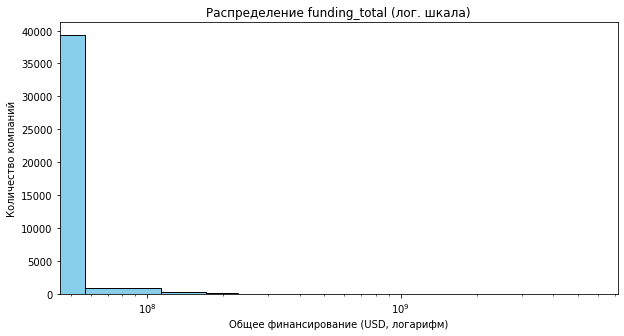

In [76]:
# Гистограмма
plt.figure(figsize=(10,5))
plt.hist(company_df['funding_total'], bins=100, color='skyblue', edgecolor='black')
plt.xscale('log')  # логарифмическая шкала помогает увидеть распределение с выбросами
plt.xlabel('Общее финансирование (USD, логарифм)')
plt.ylabel('Количество компаний')
plt.title('Распределение funding_total (лог. шкала)')
plt.show()

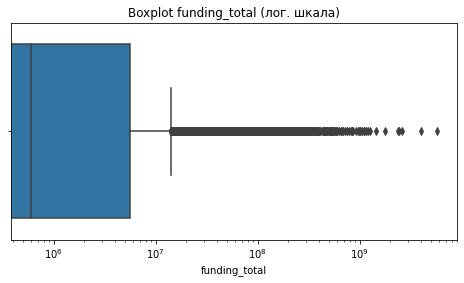

In [77]:
# Boxplot для выявления выбросов
plt.figure(figsize=(8,4))
sns.boxplot(x=company_df['funding_total'])
plt.xscale('log')
plt.title('Boxplot funding_total (лог. шкала)')
plt.show()

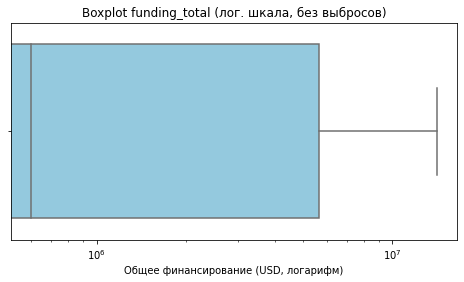

In [78]:
# Boxplot без выбросов (для лучшей видимости медианы и квартилей)
plt.figure(figsize=(8,4))
sns.boxplot(x=company_df['funding_total'], showfliers=False, color='skyblue')
plt.xscale('log')
plt.title('Boxplot funding_total (лог. шкала, без выбросов)')
plt.xlabel('Общее финансирование (USD, логарифм)')
plt.show()

**Типичные значения:**

- Большая часть компаний получила относительно небольшие суммы; медиана — около  `600 000 $ `. Это показывает «обычный» размер финансирования.

**Выбросы:**

- Единичные крупные сделки до  `5,7 млрд. $ ` сильно увеличивают среднее ( `10,1 млн.$ `), но такие значения редкие и не отражают типичное финансирование.

**Распределение:**

- Сильно скошено вправо, большая часть данных сосредоточена у низких значений. Выбросы наблюдаются только в сторону больших сумм, отрицательных значений нет.

---


### 3.3. Куплены забесплатно?

- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.

In [79]:
#  Фильтруем сделки с покупкой компаний за 0 или 1 доллар
zero_dollar_companies = acquisition_df[acquisition_df['price_amount'] <= 1]

In [80]:
# Оставляем только компании с ненулевым финансированием
company_not_null = company_df[company_df['funding_total'] != 0]

In [81]:
# Объединяем данные: берем компании с условиями сделки и их характеристики
zero_dollar_companies_df = pd.merge(
    zero_dollar_companies,
    company_not_null,
    left_on='acquired_company_id',
    right_on='company_id'
)

In [82]:
# Считаем квартили и межквартильный размах
Q1 = zero_dollar_companies_df['funding_total'].quantile(0.25)
Q3 = zero_dollar_companies_df['funding_total'].quantile(0.75)
IQR = Q3 - Q1

In [83]:
# Рассчитываем границы выбросов
lower_bound = max(0, Q1 - 1.5 * IQR)  # исключаем отрицательные значения
upper_bound = Q3 + 1.5 * IQR

In [84]:
# Определяем усы (минимальное и максимальное значения в пределах границ)
lower_whisker = zero_dollar_companies_df[zero_dollar_companies_df['funding_total'] >= lower_bound]['funding_total'].min()
upper_whisker = zero_dollar_companies_df[zero_dollar_companies_df['funding_total'] <= upper_bound]['funding_total'].max()

In [85]:

print("Статистика по компаниям, купленным за $0 или $1")
print(f"25-й перцентиль: {Q1}")
print(f"75-й перцентиль: {Q3}")
print(f"IQR: {IQR}")
print(f"Нижняя граница выбросов: {lower_bound}")
print(f"Верхняя граница выбросов: {upper_bound}")
print(f"Нижний ус: {lower_whisker}")
print(f"Верхний ус: {upper_whisker}")

Статистика по компаниям, купленным за $0 или $1
25-й перцентиль: 2000000.0
75-й перцентиль: 15500000.0
IQR: 13500000.0
Нижняя граница выбросов: 0
Верхняя граница выбросов: 35750000.0
Нижний ус: 3750.0
Верхний ус: 35150000.0


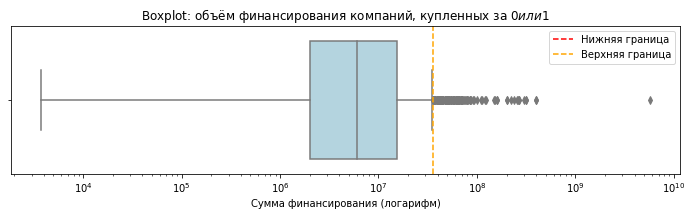

In [86]:
# Boxplot
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
sns.boxplot(x=zero_dollar_companies_df['funding_total'], color='lightblue')
plt.xscale('log')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Верхняя граница')
plt.title('Boxplot: объём финансирования компаний, купленных за $0 или $1')
plt.xlabel('Сумма финансирования (логарифм)')
plt.legend()

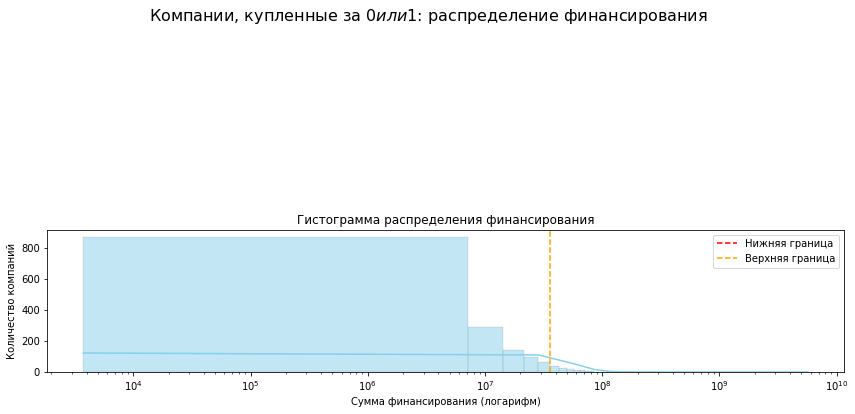

In [87]:

# Hist
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 2)
sns.histplot(zero_dollar_companies_df['funding_total'], kde=True, bins=800, color='skyblue')
plt.xscale('log')
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Нижняя граница')
plt.axvline(x=upper_bound, color='orange', linestyle='--', label='Верхняя граница')
plt.title('Гистограмма распределения финансирования')
plt.xlabel('Сумма финансирования (логарифм)')
plt.ylabel('Количество компаний')
plt.legend()

plt.suptitle('Компании, купленные за $0 или $1: распределение финансирования', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

1. Распределение финансирования имеет правостороннюю асимметрию:
- Большая часть компаний получила финансирование в диапазоне 2–15,5 млн USD.
- Присутствуют единичные крупные сделки до 35 млн USD.
- Минимальное значение финансирования в пределах усов: 3 750 USD.
2.	Компании, купленные за  0 или  1 $:
- Найдено 2 335 компаний с ненулевым финансированием.
- Часто такие сделки не отражают реальную стоимость компании — могут быть стратегическими, техническими или связаны с долговой нагрузкой, сделка могла быть частью налоговой оптимизации.
3.	Практические рекомендации:
- Инвесторам важно учитывать медианное финансирование и верхние выбросы при планировании бюджета.


---


### 3.4. Цены стартапов по категориям

Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделите категории стартапов, характеризующиеся:

- типично высокими ценами;
- и наибольшим разбросом цен за стартап.

In [88]:
# Объединяем данные о компаниях и их покупке
company_with_price = company_df.merge(
    acquisition_df[['acquired_company_id', 'price_amount']], 
    left_on='company_id', 
    right_on='acquired_company_id'
)


In [89]:
# Фильтруем нули и выбросы выше 90-го квантиля
company_with_price = company_with_price[
    (company_with_price['price_amount'] > 0) &
    (company_with_price['price_amount'] < company_with_price['price_amount'].quantile(0.9))
]

In [90]:
# 3. Группируем по категории и считаем медиану, std, min, max и размах
category_stats = company_with_price.groupby('category_code')['price_amount'].agg(
    median_price='median',
    std_price='std',
    min_price='min',
    max_price='max',
    count='count'  # количество сделок в категории
)
category_stats['range'] = category_stats['max_price'] - category_stats['min_price']


In [91]:
# Исключаем категории с малым количеством сделок (<5)
category_stats_filtered = category_stats[category_stats['count'] >= 5]

# Таким образом, размах считается только для категорий с достаточным числом сделок.

In [92]:
# Сортируем по медианной цене и размаху, выбираем топ-10
top_categories = category_stats_filtered.sort_values(
    by=['median_price', 'range'], ascending=False
).head(10)
print("Топ-10 категорий стартапов по медианной цене и разбросу:")
display(top_categories)

Топ-10 категорий стартапов по медианной цене и разбросу:


,median_price,std_price,min_price,max_price,count,range
category_code,,,,,,
cleantech,51190000.0,3.445464e+07,450000.0,110000000.0,14,109550000.0
finance,40575000.0,3.756387e+07,1200000.0,113000000.0,8,111800000.0
security,36000000.0,3.191401e+07,1850000.0,95000000.0,13,93150000.0
news,35500000.0,3.170134e+07,500000.0,90000000.0,6,89500000.0
semiconductor,30200000.0,3.118422e+07,1500000.0,105410000.0,38,103910000.0
biotech,27950000.0,3.164594e+07,109000.0,115000000.0,112,114891000.0
advertising,26350000.0,2.763636e+07,10000.0,105300000.0,54,105290000.0
games_video,26300000.0,3.060279e+07,60.0,112000000.0,56,111999936.0
mobile,26200000.0,3.231474e+07,5000.0,105000000.0,79,104995000.0


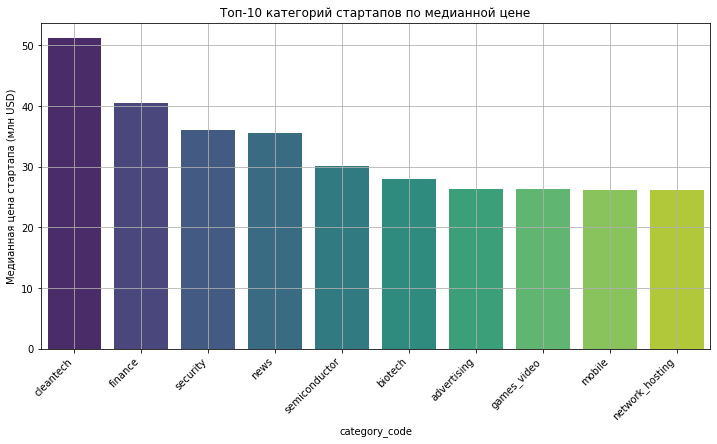

In [93]:
#  Визуализация: медианная цена
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_categories.index, 
    y=top_categories['median_price']/1_000_000, 
    palette='viridis'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Медианная цена стартапа (млн USD)')
plt.title('Топ-10 категорий стартапов по медианной цене')
plt.grid(True)
plt.show()

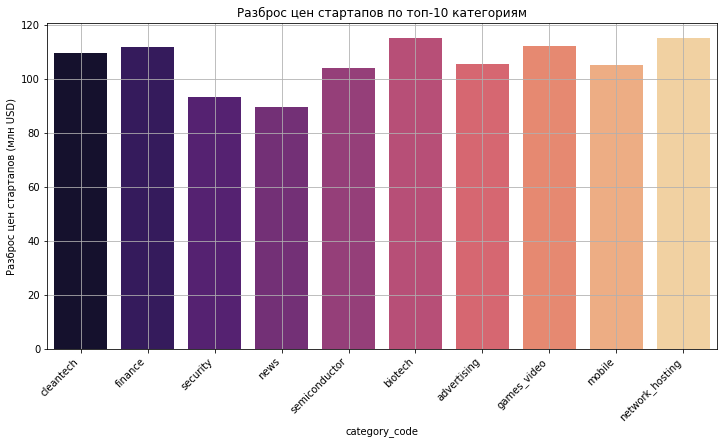

In [94]:
# Визуализация: разброс цен
plt.figure(figsize=(12,6))
sns.barplot(
    x=top_categories.index, 
    y=top_categories['range']/1_000_000, 
    palette='magma'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Разброс цен стартапов (млн USD)')
plt.title('Разброс цен стартапов по топ-10 категориям')
plt.grid(True)
plt.show()

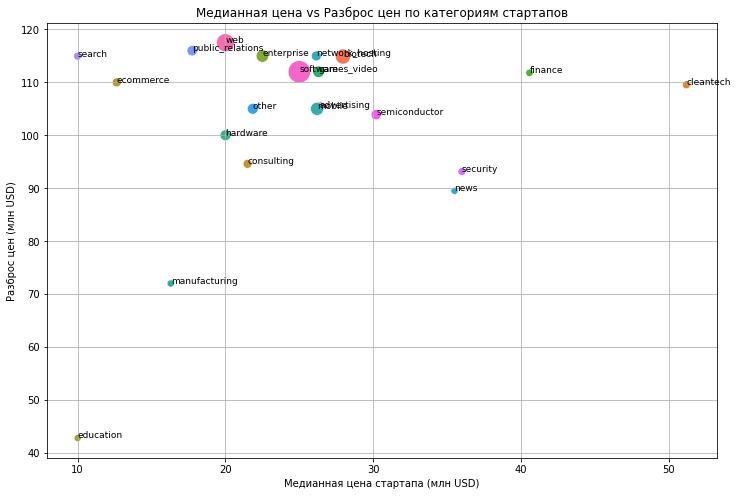

In [95]:
# Scatter plot: медиана vs размах с количеством сделок
plt.figure(figsize=(12,8))
sns.scatterplot(
    x=category_stats_filtered['median_price']/1_000_000,
    y=category_stats_filtered['range']/1_000_000,
    size=category_stats_filtered['count'],
    sizes=(50, 500),
    hue=category_stats_filtered.index,
    legend=False
)

# Добавляем подписи категорий прямо на точки
for i, txt in enumerate(category_stats_filtered.index):
    plt.text(
        x=category_stats_filtered['median_price'].iloc[i]/1_000_000,
        y=category_stats_filtered['range'].iloc[i]/1_000_000,
        s=txt, fontsize=9
    )

plt.xlabel('Медианная цена стартапа (млн USD)')
plt.ylabel('Разброс цен (млн USD)')
plt.title('Медианная цена vs Разброс цен по категориям стартапов')
plt.grid(True)
plt.show()

В данном анализе мы выбрали топ-10 категорий стартапов по медианной цене покупки и размаху цен. Такой выбор позволяет:
- Сфокусироваться на сегментах с типично высокими ценами, интересных крупным инвесторам.
- Учитывать разброс цен, отражающий потенциальный риск и вариативность рынка.
- Исключить категории с малым числом сделок (<5), чтобы статистика была надежной и не искажалась единичными сделками.
- Сочетать наглядность графиков с достаточным охватом данных — топ-10 категорий обеспечивает удобочитаемую визуализацию и информативную таблицу.

Медиана используется как показатель типичной цены, а размах (range) после удаления аномальных верхних 10% цен отражает рискованные сегменты рынка. Размер точек на scatter plot показывает количество стартапов в категории, что помогает оценить надежность статистики.


### 3.5. Сколько раундов продержится стартап перед покупкой

In [96]:
# Уникальные статусы стартапов и их количество
company_df['status'].value_counts()

operating    28621
acquired      9394
closed        2092
ipo            640
Name: status, dtype: int64

In [97]:
# Основные статистики по количеству раундов
company_df['funding_rounds'].describe()

count    40747.000000
mean         1.291531
std          1.264604
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: funding_rounds, dtype: float64

- Большинство стартапов проходит `1–2` раунда.
- Есть редкие выбросы (максимум `15` раундов), поэтому медиана лучше отражает типичное количество раундов.

---

In [98]:
# Медиана
median_rounds = company_df.groupby('status')['funding_rounds'].median().sort_values(ascending=False)

# Среднее
mean_rounds = company_df.groupby('status')['funding_rounds'].mean().sort_values(ascending=False)

# Посмотрим результат
median_rounds, mean_rounds

(status
 closed       1.0
 ipo          1.0
 operating    1.0
 acquired     0.0
 Name: funding_rounds, dtype: float64,
 status
 ipo          1.934375
 operating    1.522658
 closed       1.381453
 acquired     0.523526
 Name: funding_rounds, dtype: float64)

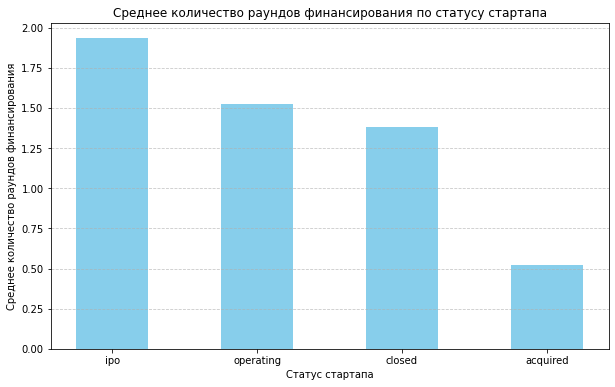

In [99]:
 # Рассчет среднего количества раундов по статусу
mean_rounds = company_df.groupby('status')['funding_rounds'].mean().reset_index()

# Сортируем по убыванию количества раундов
mean_rounds = mean_rounds.sort_values(by='funding_rounds', ascending=False)
#  Параметры для построения графика
x = np.arange(len(mean_rounds))
width = 0.5  # ширина баров

#  Построение графика
plt.figure(figsize=(10,6))
plt.bar(x, mean_rounds['funding_rounds'], width=width, color='skyblue')
plt.xticks(x, mean_rounds['status'])
plt.ylabel('Среднее количество раундов финансирования')
plt.xlabel('Статус стартапа')
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Анализ столбца funding_rounds**:
- Большинство стартапов проходит `1–2` раунда финансирования.
- Есть редкие выбросы (максимум `15` раундов), поэтому медиана лучше отражает типичное количество раундов.

**Среднее количество раундов по статусу**:
- IPO: около `1,93` раунда — успешные стартапы привлекают больше инвестиций на разных этапах.
- Operating: около `1,52` раунда — активное развитие, но еще не все этапы пройдены.
- Closed: около `1,38` раунда — прекращение деятельности до достижения поздних стадий.
- Acquired: около `0,52` раунда — быстрые сделки слияния/поглощения на ранних стадиях.

**Медианное количество раундов**:
- Для большинства статусов медиана равна `1` (кроме acquired — `0`), что подтверждает, что чаще всего стартапы проходят один раунд финансирования.

**Вывод**:
- Чем успешнее стартап, тем больше раундов финансирования он привлекает.
- Последовательное привлечение инвестиций играет ключевую роль в росте и устойчивости стартапа.

---


## Шаг 4. Итоговый вывод и рекомендации


В ходе исследования проанализированы данные о стартапах и их раундах финансирования. Данные включали информацию о компаниях, их статусе, категории деятельности, количестве раундов финансирования, сумме привлеченных средств и ключевых вехах развития. Акцент исследования был на выявлении закономерностей в финансировании стартапов, их успешности, особенностях сделок слияний и поглощений, а также на оценке типичных и экстремальных значений финансирования в разных категориях компаний.

---

**Подготовка данных**
- Разделили исходный датасет на `company_df` (компании) и `rounds_df` (раунды финансирования).  
- Привели типы данных к корректным: даты — к `datetime`, числовые значения — к `float`, категориальные столбцы — к `category`, логические признаки — к `bool`.  

**Вывод**: данные готовы к анализу и позволяют делать объективные выводы.

---

**Исследовательский анализ**
- Отобраны компании, представляющие интерес заказчика (статус «acquired» или с финансированием), около `40 747 компаний`.  
- Проведен анализ распределения финансирования: медианное финансирование составляет `600 000 $`, среднее — `10,1 млн $`, максимальное — `5,7 млрд $`; распределение сильно скошено вправо.  
- Выявлены компании, купленные за `0 или 1 $` при ненулевом финансировании — `2 335 компаний`, что может указывать на стратегические или технические сделки.  
- Проанализированы категории стартапов по типичной цене и разбросу: топ-10 категорий (например, `semiconductor`, `biotech`, `medical`) характеризуются медианой от `500 000 до 3,36 млн $` и разбросом цен до `5,7 млрд $`, представляя наибольший интерес для инвесторов с высокорискованной стратегией.  
- Изучено количество раундов финансирования по статусу: медианное количество раундов для приобретённых стартапов равно `0`, для IPO — `1`, для закрытых компаний — `1`; среднее количество раундов составляет `0,52 для acquired`, `1,09 для IPO`, `1,12 для closed`, что отражает быстрые сделки на ранних стадиях и постепенное привлечение инвестиций успешными стартапами.

---

**Рекомендации**
- Последовательное привлечение инвестиций важно для роста и успешного выхода стартапа.  
- Инвесторам стоит ориентироваться на медианные значения финансирования и учитывать редкие крупные сделки при планировании бюджета.  
- Компании, купленные за минимальную сумму, требуют отдельного анализа для понимания стратегической ценности (`2 335 компаний`).  
- Для стартапов с высоким потенциалом (топ-10 категорий) рекомендуется мониторинг и готовность к высокорисковым инвестициям, особенно в сегментах `semiconductor`, `biotech`, `medical`, `cleantech` и `nanotech`.

---
